In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from fastai import *
from fastai.vision import *

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
names = []
labels = []
broken_images = []
for dirname, _, filenames in os.walk('/content/gdrive/My Drive/scene_dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Any results you write to the current directory are saved as output.

Streaming output truncated to the last 5000 lines.
/content/gdrive/My Drive/scene_dataset/seg_test/glacier/22800.jpg
/content/gdrive/My Drive/scene_dataset/seg_test/glacier/22581.jpg
/content/gdrive/My Drive/scene_dataset/seg_test/glacier/22609.jpg
/content/gdrive/My Drive/scene_dataset/seg_test/glacier/22694.jpg
/content/gdrive/My Drive/scene_dataset/seg_test/glacier/22817.jpg
/content/gdrive/My Drive/scene_dataset/seg_test/glacier/22265.jpg
/content/gdrive/My Drive/scene_dataset/seg_test/glacier/22318.jpg
/content/gdrive/My Drive/scene_dataset/seg_test/glacier/22347.jpg
/content/gdrive/My Drive/scene_dataset/seg_test/glacier/22934.jpg
/content/gdrive/My Drive/scene_dataset/seg_test/glacier/22864.jpg
/content/gdrive/My Drive/scene_dataset/seg_test/glacier/22974.jpg
/content/gdrive/My Drive/scene_dataset/seg_test/glacier/22859.jpg
/content/gdrive/My Drive/scene_dataset/seg_test/glacier/22869.jpg
/content/gdrive/My Drive/scene_dataset/seg_test/glacier/22891.jpg
/content/gdrive/My Drive/

In [ ]:
classes =['glacier','sea','forest','street','mountain','buildings']  ## deifining labels of the images
train_pth = Path('/content/gdrive/My Drive/scene_dataset/seg_train')
for c in classes:
    print(c)
    verify_images(train_pth/c,delete=True,max_size=500)

glacier


sea


forest


street


mountain


buildings


# Loading pics with 224x224

In [ ]:
path = '/content/gdrive/My Drive/scene_dataset'

In [ ]:
np.random.seed(42)
data_train = ImageDataBunch.from_folder(path, train='seg_train', valid='seg_val', test='seg_test' ,ds_tfms=get_transforms(), size=224, bs=64).normalize(imagenet_stats)


In [ ]:
data_train.classes   ## printing the classes of our dataset

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

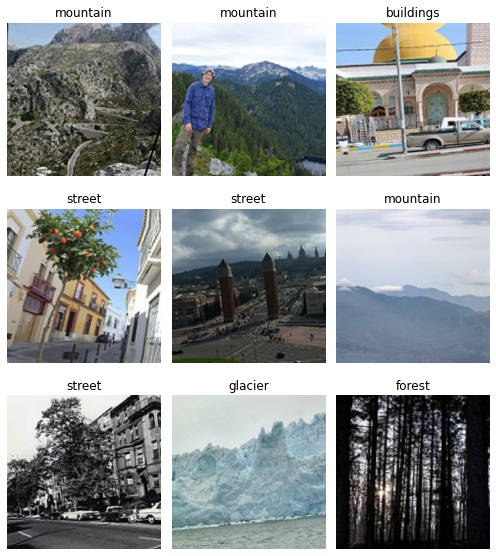

In [ ]:
data_train.show_batch(rows=3,figsize=(7,8))  ## viewing our data images

In [ ]:
data_train.classes, data_train.c, len(data_train.train_ds),len(data_train.valid_ds)

(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
 6,
 11224,
 2810)

In [ ]:
model = cnn_learner(data_train,models.resnet34,metrics=[error_rate,accuracy]) #loading resnet34 model

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
model.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.594389,0.295087,0.098577,0.901424,15:16
1,0.448486,0.278041,0.100356,0.899644,02:19
2,0.327278,0.228536,0.085409,0.914591,02:20
3,0.272465,0.217684,0.074377,0.925623,02:19
4,0.243221,0.203316,0.069751,0.930249,02:19
5,0.237114,0.201853,0.074377,0.925623,02:18
6,0.196687,0.197314,0.072954,0.927046,02:18
7,0.172967,0.184570,0.066904,0.933096,02:19
8,0.171153,0.181074,0.070463,0.929537,02:20
9,0.164036,0.178613,0.069395,0.930605,02:20


In [ ]:
model.validate()

[0.1786126, tensor(0.0694), tensor(0.9306)]

**Validation Accuracy:** 93.06%

In [ ]:
model.save('resnet34_224x224')

In [ ]:
data_val = ImageDataBunch.from_folder(path, train='seg_val', valid='seg_train', test='seg_test' ,ds_tfms=get_transforms(), size=224, bs=64).normalize(imagenet_stats)

In [ ]:
model = cnn_learner(data_val,models.resnet34,metrics=[error_rate,accuracy]).load('resnet34_224x224') #loading resnet34 model

In [ ]:
model.validate() 

[0.09565737, tensor(0.0335), tensor(0.9665)]

**Training Accuracy:** 96.65

In [ ]:
data_test = ImageDataBunch.from_folder(path, train='seg_train', valid='seg_test', test='seg_val', ds_tfms=get_transforms(), size=224, bs=64).normalize(imagenet_stats)

In [ ]:
model = cnn_learner(data_test,models.resnet34,metrics=[error_rate,accuracy]).load('resnet34_224x224') #loading resnet34 model

In [ ]:
model.validate() 

[0.1872777, tensor(0.0677), tensor(0.9323)]

**Testing Accuracy:** 93.23%

# Confusion Matrix

In [ ]:
interpret = ClassificationInterpretation.from_learner(model)

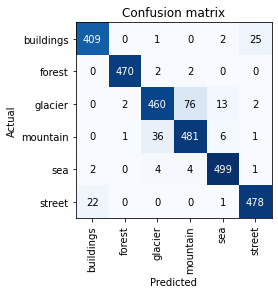

In [ ]:
interpret.plot_confusion_matrix()

In [ ]:
losess,idxs = interpret.top_losses()

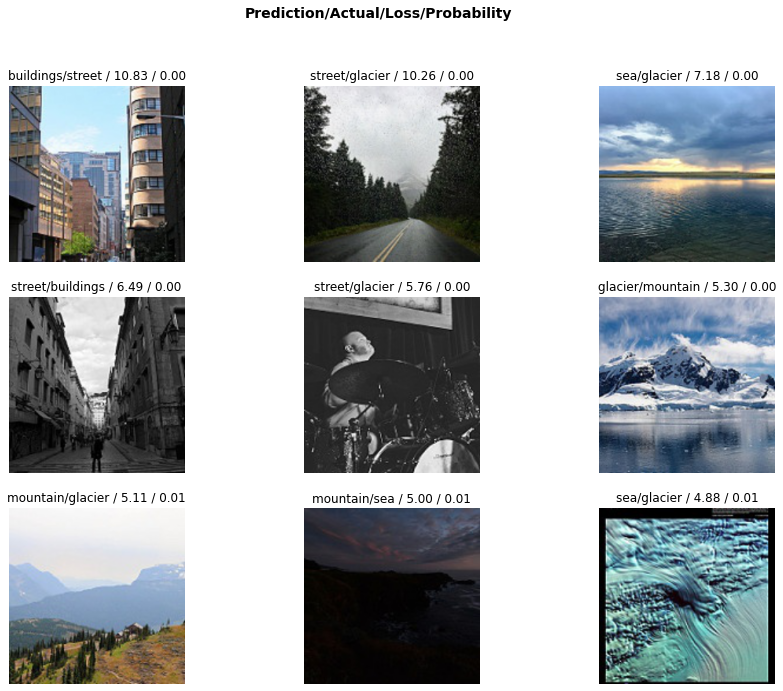

In [ ]:
interpret.plot_top_losses(9,figsize=(15,11))  ### these are some of our wrongly classified images (top 9)

In [ ]:
interpret.most_confused(min_val=5)   ## seeing which were badly predictied

[('glacier', 'mountain', 66),
 ('mountain', 'glacier', 41),
 ('buildings', 'street', 38),
 ('glacier', 'sea', 12),
 ('street', 'buildings', 9),
 ('sea', 'mountain', 6)]

Category:  buildings , tensor(0) , tensor([9.7770e-01, 1.4792e-07, 2.0834e-07, 1.3403e-06, 4.5486e-07, 2.2301e-02])


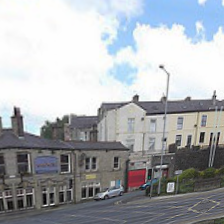

In [ ]:
test_img = data.train_ds[0][0]
pred_class,pred_idx,outputs = model.predict(test_img)
print("Category: ",pred_class,",",pred_idx,",",outputs)

data.train_ds[0][0]

Category:  mountain , tensor(3) , tensor([5.1800e-06, 5.8958e-04, 1.1072e-01, 8.8669e-01, 1.8518e-03, 1.4304e-04])


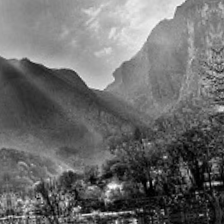

In [ ]:
test_img =data.train_ds[6378][0]
pred_class,pred_idx,outputs = model.predict(test_img)
print("Category: ",pred_class,",",pred_idx,",",outputs)

data.train_ds[6378][0]

Category:  sea , tensor(4) , tensor([1.8954e-05, 9.7388e-06, 4.4537e-01, 9.4503e-02, 4.6009e-01, 2.2649e-06])


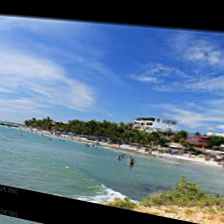

In [ ]:
test_img = data.train_ds[3213][0]
pred_class,pred_idx,outputs = model.predict(test_img)
print("Category: ",pred_class,",",pred_idx,",",outputs)

data.train_ds[8133][0]